# Instructions

In this challenge, you'll try to predict the severity of car accidents, based on features collected from after-crash police investigation

This [Kaggle challenge](https://www.kaggle.com/c/accident-severity) comprises of 1,000,000 accidents report, split into multiple `.csv` files.

**The goal of the model is to predict the severity of car accidents**. The target variable is called `grav` (for 'gravity') in the file `users.csv`. This variable has four levels, but in this challenge, we'll convert it to a binary classification problem. We will:
- Load data into pandas
- Create a single DataFrame for our problem, where each row is a user involved in an accident
- Extract the features you think would be relevant to predict its severity
- Build a data pipeline that gives you a baseline model
- Then, iterate on the different phase and try to get the best model! 

🔥 **Today is a special challenge** :
- You will send your best score to your batch slack channel!
- The winner will present its notebook to the class during the recap session at 5pm 💪

---
⚠️ **Good practices to follow for large exploratory notebooks**
- Build your Notebook linearily so that it can always be run from top to bottom without any errors
- Clean the outputs of your cells that are not needed
- Clean your variables in memory when you don't need them (especially when they are very large). You can use the python built-in function `del`, or the the **Jupyter nbextentions** `variable_inspector`
- Make heavy use of `table_of_content` and `collapsable_headings` 

# Data sourcing

Let's get started! The data we want to use is from the `csv` files in `/data/data_training`

## Loading data

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# ! curl https://wagon-public-datasets.s3.amazonaws.com/car_acccidents_datasets.zip > data.zip
# ! unzip data.zip -d data
# ! rm -rf data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79.7M  100 79.7M    0     0  4539k      0  0:00:17  0:00:17 --:--:-- 3666k
Archive:  data.zip
   creating: data/data_training/
  inflating: data/data_training/users.csv  
  inflating: data/data_training/places.csv  
  inflating: data/data_training/caracteristics.csv  
  inflating: data/data_training/vehicles.csv  
  inflating: data/data_training/cara.csv  
   creating: data/data_val/
  inflating: data/data_val/users.csv  
  inflating: data/data_val/places.csv  
  inflating: data/data_val/caracteristics.csv  
  inflating: data/data_val/vehicles.csv  
  inflating: data/data_val/cara.csv  
  inflating: data/__MACOSX/data_val/._cara.csv  


In [104]:
cara = pd.read_csv("data/data_training/caracteristics.csv", encoding="ISO-8859-1")
users = pd.read_csv("data/data_training/users.csv", encoding="ISO-8859-1")
places = pd.read_csv("data/data_training/places.csv", encoding="ISO-8859-1")
vehicles = pd.read_csv("data/data_training/vehicles.csv", encoding="ISO-8859-1")

/Users/brunolajoie/.pyenv/versions/3.8.5/envs/lewagon502/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


❓ Explore the different tables, and the different variables using `challenge_variable.md`, which provides a description of features. More details can be found [here in French](https://www.data.gouv.fr/fr/datasets/r/8d4df329-bbbb-434c-9f1f-596d78ad529f) if needed, or in the [Kaggle](https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016/discussion) discussion channel. 

In [105]:
# Your code below

## Merge datasets

❓ We will create one single dataset where each row should represent a `user` in a car, by merging the data from the different files dataset.  
**Take some time to think about how you would do it yourself**, and only then, read carefully through the code below to understand exactly what we did

In [106]:
# Merge caracteristics and places on 'Num_Acc'
data = cara.merge(places, on='Num_Acc')

In [107]:
# Create a common key to merge users amd vehicles on
users['Num_Acc_num_veh'] = users['Num_Acc'].map(lambda x: str(x)) + users['num_veh']
vehicles['Num_Acc_num_veh'] = vehicles['Num_Acc'].map(lambda x: str(x)) + vehicles['num_veh']
# Remove useless columns
vehicles = vehicles.drop(columns=['index'])
users = users.drop(columns=['index', 'Num_Acc', 'num_veh'])
# Merge vehicles and users
tmp = vehicles.merge(users, on='Num_Acc_num_veh', how='inner')

In [108]:
# Merge all datasets on 'Num_Acc'
data = data.merge(tmp, on='Num_Acc', how='inner')
del tmp

In [109]:
data.shape

(1209362, 54)

In [110]:
data

,index_x,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,...,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais
0,300000,201100001414,11,11,4,130,3,2,1,1.0,...,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1994.0
1,300000,201100001414,11,11,4,130,3,2,1,1.0,...,1.0,1,1,1,1.0,11.0,0.0,0.0,0.0,1967.0
2,300001,201100001415,11,1,16,1145,1,2,2,7.0,...,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1956.0
3,300001,201100001415,11,1,16,1145,1,2,2,7.0,...,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1948.0
4,300001,201100001415,11,1,16,1145,1,2,2,7.0,...,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209357,839983,200500087953,5,12,27,1500,1,2,3,2.0,...,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1972.0
1209358,839983,200500087953,5,12,27,1500,1,2,3,2.0,...,1.0,1,4,1,5.0,23.0,0.0,0.0,0.0,1990.0
1209359,839983,200500087953,5,12,27,1500,1,2,3,2.0,...,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1965.0
1209360,839984,200500087954,5,12,31,2100,5,2,1,2.0,...,1.0,1,4,1,0.0,13.0,0.0,0.0,0.0,1951.0


# Preprocessing

We will apply some preprocessing methods like standardization or missing values removal or imputing.
Remember to look at `challenge_variable.md` for a description of features.

## Clean Dataset

In [111]:
# drop lines without targets (if any)
data_cleaned = data[~np.isnan(data.grav)]

In [112]:
# Check whih features with highest ratio of NaN per column
(data_cleaned.isna().sum() / data_cleaned.shape[0]).sort_values(ascending=False)

v2                 0.953958
lat                0.632648
long               0.632648
gps                0.631134
pr1                0.463472
pr                 0.462609
v1                 0.383683
adr                0.184124
voie               0.048149
place              0.032898
secu               0.011189
lartpc             0.003175
larrout            0.002416
an_nais            0.001841
nbv                0.001731
vosp               0.001060
actp               0.000882
locp               0.000867
etatp              0.000825
infra              0.000662
env1               0.000653
plan               0.000445
prof               0.000443
surf               0.000427
obs                0.000427
circ               0.000392
situ               0.000355
obsm               0.000236
trajet             0.000186
manv               0.000106
choc               0.000064
atm                0.000039
col                0.000017
com                0.000005
catr               0.000002
hrmn               0

In [116]:
# Remove too incomplete features
too_incomplete_features=[
    'locp', 'actp', 'etatp'
]

In [87]:
# Remove features that can be safely considered useless
# for the predictive power of our model upon reading the docs
useless_features=[
    'v2', 'lat', 'long', 'gps', 'pr1', 'pr', 'v1', 'adr', 'voie',
    'index_x', 'Num_Acc', 'Num_Acc_num_veh', 'Num_Acc', 'num_veh', 'index_y',
    'jour', 'an',
    'dep', 'com', 'env1',
]

In [118]:
data_cleaned.drop(columns=too_incomplete_features+useless_features, inplace=True)

The secu feature seams extremely important. Let's handle this one specifically!

In [119]:
# Drop lines without 'secu'
data_cleaned = data_cleaned[~np.isnan(data.secu)]
# Only keep rows with "secu" number consisting of two digits
data_cleaned = data_cleaned[data_cleaned.secu.map(lambda x: len(str(round(x)))) == 2]
# Split as per feature description
data_cleaned['safety_equipment'] = data_cleaned.secu.map(lambda x: str(round(x))[0])
data_cleaned['is_safety_equipment'] = data_cleaned.secu.map(lambda x: str(round(x))[1])
data_cleaned.drop(columns=['secu'], inplace=True)

In [120]:
# Replace hrmn by hh only (minute granularity is considered useless)
data_cleaned['hour_of_day'] = pd.Series(data_cleaned.hrmn.map(lambda x: str(x)[0:-2])).replace('', 0)
data_cleaned.drop(columns=['hrmn'], inplace=True)
data_cleaned.shape

(1125397, 33)

We now have a `data_cleaned` dataset! Let's now engineer our features as needed

## Prepare features and target

### Numerical features

In [133]:
features_numerical = ['nbv', 'senc', 'an_nais', 'occutc', 'lartpc', 'larrout']

In [139]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler

In [144]:
def preprocess_numerical_features(X):
    '''
    Returns a new DataFrame with
    - Missing values replaced by Column Mean
    - Features Standard Scaled
    - Original Features names kept in the DataFrame
    '''
    df = X.copy()
    col_names = df.columns
    df = SimpleImputer(strategy='mean').fit_transform(df)
    tmp = StandardScaler().fit_transform(df)
    
    return pd.DataFrame(tmp, columns=col_names)

In [146]:
# Check your code below
preprocess_numerical_features(data_cleaned[features_numerical]).head()

,nbv,senc,an_nais,occutc,lartpc,larrout
0,-0.062306,-0.066734,1.306320,-0.05353,-0.249076,-0.497964
1,-0.062306,-0.066734,-0.252250,-0.05353,-0.249076,-0.497964
2,-0.062306,-0.066734,-0.887223,-0.05353,-0.249076,-0.142971
3,-0.062306,-0.066734,-1.349022,-0.05353,-0.249076,-0.142971
4,-0.062306,-0.066734,-1.233572,-0.05353,-0.249076,-0.142971


❓ Do you get a Warning "A value is trying to be set on a copy of a slice from a DataFrame"?
If so, it may be because you are trying to modify the input DataFrame `data_cleaned`!

Read this [important blog on copy vs. view](https://www.practicaldatascience.org/html/views_and_copies_in_pandas.html) of pandas DataFrame and try to solve your warning by yourself



<details>
    <summary>Hint</summary>

`pd.DataFrame.copy()`
</details>

### Cyclical features

In [125]:
features_cyclical = ['hour_of_day', 'mois']

In [126]:
# YOUR CODE BELOW
import math
def preprocess_cyclical_features(X):
    '''
    Input: DataFrame X
    Output: Returns new DataFrame, where all its features X_i have been replaced
    by both their sin(X_i) and cos(X_i), and delete initial feature X_i.
    '''
    df = X.copy()
    for feature in features_cyclical:
        if feature == 'hour_of_day':
            cycle = 24
        if feature == 'mois':
            cycle = 12
        df[f'{feature}_sin'] = np.sin(2*math.pi / cycle * df[feature].astype('int'))
        df[f'{feature}_cos'] = np.sin(2*math.pi / cycle * df[feature].astype('int'))
        df.drop(columns=[feature], inplace=True)
    return df

In [127]:
# Check your code below
preprocess_cyclical_features(data_cleaned[features_cyclical]).head()

,hour_of_day_sin,hour_of_day_cos,mois_sin,mois_cos
0,0.258819,0.258819,-0.5,-0.5
1,0.258819,0.258819,-0.5,-0.5
2,0.258819,0.258819,0.5,0.5
3,0.258819,0.258819,0.5,0.5
4,0.258819,0.258819,0.5,0.5



### categorical features

❓ Create the last group of feature (categorical features) without hardcoding them manually. Then, create the associated preprocessing method

In [128]:
features_categorical = list(set(data_cleaned.columns) - set(features_numerical) - set(features_cyclical) - {'grav'})

In [129]:
def preprocess_categorical_features(X):   
    ''' Returns a new DataFrame with dummified columns'''
    df = X.copy()
    return pd.get_dummies(df.apply(lambda col: col.astype('category')))

❓ Create the new `data_preprocessed` dataset by concatenating all three preprocessing, and then drop all remaining NaN that could not have been handled previously

In [130]:
# YOUR CODE BELOW
data_preprocessed = pd.concat(
    [
        data_cleaned[['grav']],
        preprocess_cyclical_features(data_cleaned[features_cyclical]),
        preprocess_numerical_features(data_cleaned[features_numerical]),
        preprocess_categorical_features(data_cleaned[features_categorical])
    ], axis=1)
data_preprocessed.shape

(1125397, 218)

In [131]:
# Drop all remaining NaN that could not have been handled previously
data_preprocessed.dropna(inplace=True)
data_preprocessed.shape

(1125397, 218)

## Split Dataset
❓ Create X and y, and don't forget to convert the classification into a binary task.

For instance:

```python
data['grav_binary'] = data['grav'].replace({1: 0, 4: 0, 2: 1, 3: 1})
```

In [150]:
# Create X and y
X = data_preprocessed.drop(columns=['grav'])
y = data_preprocessed['grav'].replace({1: 0, 4: 0, 2: 1, 3: 1})

In [151]:
# Create a smaller dataset for investigation purpose only
sample_size = 20000
tmp = data_preprocessed.sample(sample_size, random_state=414)
X_small = tmp.drop(columns=['grav'])
y_small = tmp['grav'].replace({1: 0, 4: 0, 2: 1, 3: 1})

In [152]:
# Train Test Split using random_state=414
# (let's forget for the sake of this challenge that we are data-leaking a bit here, we should have done the split earlier)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=414)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, random_state=414)

In [153]:
# (optional) Create here an train/eval split within the train set itself.
# Some powerfull models (XGBOOST, Neural Network...) which are prone to overfitting on the traning set, needs "early stopping criteria", to avoid descending the gradient completely and avoid overfitting.
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train)
X_train_train_small, X_train_test_small, y_train_train_small, y_train_test_small = train_test_split(X_train_small, y_train_small)

# Features exploration

You now have a dataset ready for training! 
**Skip directly to section 5 to get a baseline model working ASAP**, and only then come back to this section 4 if you want to better understand your X and get inspiration for the best model to use, or for some feature selection to reduce model complexity

## Visualization

Investigate your X. Are features strongly correlated? Are some feature more important than other?

<AxesSubplot:>

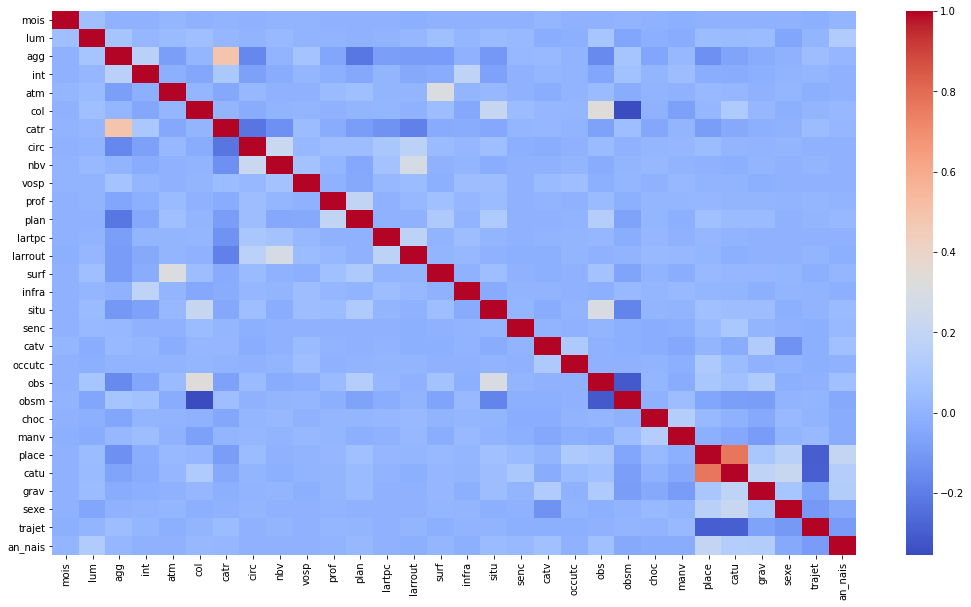

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(pd.DataFrame(data_cleaned.corr()), cmap='coolwarm')

## PCA

❓Fit a PCA and plot the cumulated sum of explained variance ratio of your Principal Component. Do you see any clear elbow?

In [76]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_small)

(-10.8, 226.8)

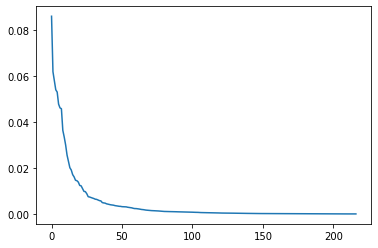

In [77]:
plt.plot(pca.explained_variance_ratio_)
plt.xlim()

(-10.8, 226.8)

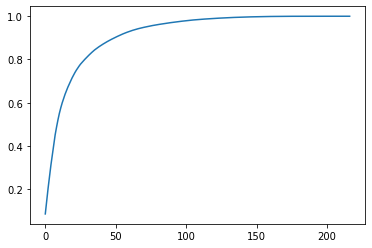

In [78]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim()

## Forest-based most important features

❓ Fit a default RandomForestClassifier on a small smaple to estimate the top 20 feature importance. Do they make intuitive sense to your point of view?  Do you see any clear elbow for dimension-reduction?

In [187]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(class_weight='balanced')
forest.fit(X_train_small, y_train_small)

RandomForestClassifier(class_weight='balanced')

(-10.8, 100.0)

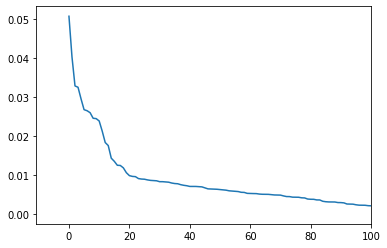

In [188]:
plt.plot(np.sort(forest.feature_importances_)[::-1])
plt.xlim(xmax=100)

In [189]:
# Top 12 features
features_top_12 = pd.DataFrame(zip(forest.feature_importances_, list(X_train.columns))  
                              ).sort_values(by=0, ascending=False)[:12]
features_top_12

,0,1
6,0.050640,an_nais
9,0.040228,larrout
1,0.032786,hour_of_day_cos
0,0.032448,hour_of_day_sin
20,0.029465,safety_equipment_1
2,0.026707,mois_sin
3,0.026434,mois_cos
21,0.025929,safety_equipment_2
153,0.024503,agg_1
154,0.024415,agg_2


❓ (Optional) There are better ways to estimate feature importance in a RandomForest. Feel free to try to two following options

**Option 1** : Recursive-method
1. Train a first model, note top1 feature (computed based on the gini-explicative power of the feature, in each tree)
2. Remove top1 from your X and retrain a RandomForest. Note top1 feature and it's relative importance
3. Loop

**Option 2** : Permutation-method ([sklearn.inspection.permutation_importance](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance)), works with any model!
1. Train a first model, keep track of its accuracy
2. Take one feature and shuffle its columns. Compute new accuracy of the corrupted dataset, and note by how much it has been reduced.
3. Loop over all features and rank them by accuracy reduction

In [190]:
# Permutation-method
from sklearn.inspection import permutation_importance

permutation = permutation_importance(
    forest, X_train_test_small, y_train_test_small, n_jobs=-1, scoring='f1_macro', n_repeats=2)

pd.DataFrame(zip(permutation.importances_mean, list(X_train.columns))).sort_values(by=0, ascending=False)[:12]

,0,1
20,0.046632,safety_equipment_1
21,0.033036,safety_equipment_2
190,0.031776,catv_7
72,0.029668,catr_4.0
154,0.029060,agg_2
153,0.028760,agg_1
95,0.021879,obs_0.0
6,0.017602,an_nais
112,0.014987,col_1.0
71,0.014201,catr_3.0


Same permutation-method below, but applied on non-encoded features

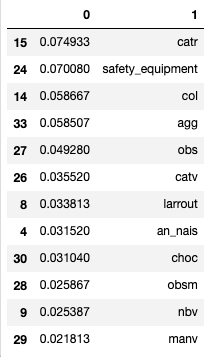

# Modeling

In [148]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

## Baseline performance metrics

❓ What is the class balance of your target?  
Do you think acccuracy would be a good score?
If you don't want to favor any class over the other, what would be a good performance metric for your problem? 

<details>
    <summary>Answer</summary>

In such an unbalanced problem, accuracy is meaningless: A very dumb model predicting always zeros would have great accuracy, to the detriment of the predictive power of class  1, which has precision and recall equal to zero!
    
The non-weighted mean between both f1 score of each class called `f1_macro` would be a good measure for this type of problem.
</details>

## Simple Model (A first iteration)

❓ Create a simple model, fast to train, to classify the severity of the accidents. Start simple. Don't forget to fit on your training set and evaluate the score on your test set. Can you beat the Baseline? What about its Accuracy? Measure the time it takes on the full dataset, with `%%time` 

In [157]:
# Train a SGDClassifier logistic regression, one of the fastest model

model = SGDClassifier(loss='log', alpha=0.5)
cv_results = cross_validate(model, X_train_small, y_train_small, cv=10, n_jobs=1, scoring=['accuracy', 'f1_macro'])
cv_results['test_f1_macro'].mean()

0.4370003211466627

A simple logistic classifier does not perform better than a dumb model predicting always the majority class!

In [158]:
# Simple Decision Tree

cv_results = cross_validate(DecisionTreeClassifier(), X_train_small,
                            y_train_small, cv=5, scoring=['accuracy', 'f1_macro'])
cv_results['test_f1_macro'].mean()

0.6225431019949077

# 🔥🔥🔥 Advanced Models - LeWagon batch contest ! 🔥🔥🔥

❓ Now it's your turn to shine! Play with different models and try to find the best one on your training set!
- Send your best `f1_macro` to your slack channel without saying which model you used!
- ⚠️ Only send score tested on the `y_test` of complete size (30% of 1M+ rows!)
- Feel free to use your X_small for investigation purpose
- If it takes too long to train, simplify your model, or use better feature preprocessing/selection

The winner will present its notebook to the class during the reboot 💪

(Don't forget, your Notebook should be made to be run from top to bottom in one go!)

<details>
    <summary>Some hints</summary>
Take a closer look at feature engineering: Are there some features we haven't correctly preprocessed?  
    
Most of the time, a good dataset trumps a good model!
</details>

## SGD optimized

In [ ]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [233]:
%%time

model = SGDClassifier()

search_space = {'loss' : ['log', 'hinge'],
                'penalty': ['elasticnet'],
                'l1_ratio': stats.uniform(0.01, 0.9),
                'alpha': stats.loguniform(0.0001, 1)
               }

cv_model = RandomizedSearchCV(model,
                            scoring='f1_macro',
                            param_distributions = search_space,
                            cv = 3,
                            n_iter = 50,
                            n_jobs=-1, verbose=5)

search = cv_model.fit(X_train_small, y_train_small)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    8.2s finished


CPU times: user 547 ms, sys: 75.1 ms, total: 622 ms
Wall time: 8.57 s


In [213]:
search.best_estimator_

SGDClassifier(alpha=0.00020886853583491964, l1_ratio=0.6005897416607924,
              penalty='elasticnet')

In [214]:
best_sdg = SGDClassifier(alpha=0.0016524175104721261, l1_ratio=0.08496688804208596,
              loss='log', penalty='elasticnet')

cv_results = cross_validate(best_sdg, X_train_small, y_train_small, cv=10, scoring='f1_macro')
print(cv_results['test_score'].mean())

0.6612882589140556


In [215]:
best_sgd = search.best_estimator_
best_sgd.fit(X_train_small, y_train_small)
print(classification_report(best_sgd.predict(X_test_small), y_test_small))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      4211
           1       0.42      0.61      0.50       789

    accuracy                           0.81      5000
   macro avg       0.67      0.73      0.69      5000
weighted avg       0.84      0.81      0.82      5000



## Random Forest Classifier

In [159]:
# Simple Random Forest
forest = RandomForestClassifier(class_weight='balanced')
cv_results = cross_validate(forest, X_train_small, y_train_small, cv=5, scoring='f1_macro')
print(cv_results['test_score'].mean())

0.6507938875750579


In [161]:
forest.fit(X_train_small, y_train_small)

RandomForestClassifier(class_weight='balanced')

In [162]:
# Do we overfit on our train set?
f1_score(forest.predict(X_train_small), y_train_small, average='macro')

1.0

In [98]:
print(classification_report(forest.predict(X_test_small), y_test_small))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      4500
           1       0.30      0.68      0.42       500

    accuracy                           0.81      5000
   macro avg       0.63      0.75      0.65      5000
weighted avg       0.89      0.81      0.84      5000



### Hyperparameter tuning

In [220]:
# First, we start with a wide RandomSearch because we have no idea

model = RandomForestClassifier(class_weight='balanced')

search_space = {'n_estimators': [int(x) for x in np.linspace(50, 1000, num=20)],
                'max_depth': [int(x) for x in np.linspace(10, 100, num=10)] + [None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'criterion': ['gini'],
                'bootstrap': [True, False]
                }

cv_model = RandomizedSearchCV(model,
                              scoring='f1_macro',
                              param_distributions=search_space,
                              n_jobs=-1,
                              cv=3,
                              n_iter=30,
                              verbose=1)

search = cv_model.fit(X_train_small, y_train_small)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   24.0s finished


In [285]:
search.best_score_

0.8144

In [286]:
search.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 70,
 'criterion': 'gini',
 'bootstrap': False}

In [165]:
# Then, we refine with a narrower gridsearch

model = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [int(x) for x in np.linspace(50, 500, num=10)],
    'bootstrap': [False],
    'max_depth': [int(x) for x in np.linspace(1, 30, num=30)],
}

grid_search = RandomizedSearchCV(model, param_grid, cv=3, n_jobs=-1, scoring='f1_macro', verbose=1)

search = grid_search.fit(X_train_small, y_train_small)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   24.9s finished


In [166]:
search.best_score_

0.7024207856854435

In [167]:
search.best_params_

{'n_estimators': 300, 'max_depth': 15, 'bootstrap': False}

In [217]:
best_forest = RandomForestClassifier(**{'n_estimators': 300, 'max_depth': 15, 'bootstrap': False})
cross_validate(best_forest, X_train_small, y_train_small, cv=5, scoring='f1_macro')['test_score'].mean()

0.6407799340284293

In [ ]:
# Final Evaluation!
print(classification_report(best_forest.fit(X_train_small, y_train_small).predict(X_test_small), y_test_small))

## AdaBoost Trees

In [236]:
adaboost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(class_weight='balanced'),
    n_estimators=100,
    learning_rate=0.5)

In [240]:
adaboost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': 'balanced',
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight='balanced'),
 'learning_rate': 0.5,
 'n_estimators': 100,
 'random_state': None}

In [238]:
cv_results = cross_validate(adaboost, X_train_small, y_train_small, cv=5, scoring='f1_macro', n_jobs=-1)
print(cv_results['test_score'].mean())

0.6193995948513012


In [239]:
# Final classif report of the small test set
adaboost.fit(X_train_small, y_train_small)
print(classification_report(best_adaboost.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85    197202
           1       0.68      0.50      0.58     84148

    accuracy                           0.78    281350
   macro avg       0.74      0.70      0.71    281350
weighted avg       0.77      0.78      0.77    281350



### Hyperparameter tuning

In [241]:
from scipy import stats

In [245]:
model = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(class_weight='balanced')
)

param_distribution = {
    #'n_estimators': stats.randint(20,200),
    'learning_rate': stats.uniform(0.1,2),
    'base_estimator__max_depth': stats.randint(2,10),
}

grid_search = RandomizedSearchCV(model, param_distribution,
                                 cv=3, scoring='f1_macro', n_iter=30,
                                 n_jobs=-1, verbose=4)

search = grid_search.fit(X_train_small, y_train_small)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   22.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   24.6s finished


In [246]:
search.best_params_

{'base_estimator__max_depth': 3, 'learning_rate': 0.6798449747588363}

In [247]:
best_adaboost = search.best_estimator_

In [248]:
best_adaboost.fit(X_train_small, y_train_small)

CPU times: user 2.6 s, sys: 118 ms, total: 2.71 s
Wall time: 2.73 s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3),
                   learning_rate=0.6798449747588363)

In [249]:
# Final classif report of the test set!
print(classification_report(best_adaboost.predict(X_test_small), y_test_small))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      3168
           1       0.72      0.45      0.56      1832

    accuracy                           0.74      5000
   macro avg       0.73      0.68      0.68      5000
weighted avg       0.73      0.74      0.72      5000



## Gradient Boosting

In [255]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
cross_validate(model, X_train_small, y_train_small, cv=10, scoring='f1_macro', n_jobs=-1)['test_score'].mean()

0.6639873618246362

### XGBOOST

In [224]:
xgb = XGBClassifier(max_depth=10, n_estimators=100, njobs=-1, learning_rate=1) # default loss function binary logloss

In [225]:
xgb.fit(X_train_small, y_train_small,
        verbose=True,
        eval_set=[(X_train_train_small, y_train_train_small), (X_train_test_small, y_train_test_small)],
        eval_metric=["error", 'logloss'], # error means accuracy
        early_stopping_rounds=1 # uses the last metric in the eval_metric list to early stop if logloss starts to increase
        )

[17:35:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.15022	validation_0-logloss:0.39219	validation_1-error:0.14987	validation_1-logloss:0.38797
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 1 rounds.
[1]	validation_0-error:0.13707	validation_0-logloss:0.34045	validation_1-error:0.13573	validation_1-logloss:0.33725
[2]	validation_0-error:0.12978	validation_0-logloss:0.31674	validation_1-error:0.13093	validation_1-logloss:0.31587
[3]	validation_0-error:0.12160	validation_0-logloss:0.29666	validation_1-error:0.12160	validation_1-logloss:0.29645
[4]	validation_0-

[66]	validation_0-error:0.00000	validation_0-logloss:0.02074	validation_1-error:0.00000	validation_1-logloss:0.02090
[67]	validation_0-error:0.00000	validation_0-logloss:0.01982	validation_1-error:0.00000	validation_1-logloss:0.02005
[68]	validation_0-error:0.00000	validation_0-logloss:0.01927	validation_1-error:0.00000	validation_1-logloss:0.01951
[69]	validation_0-error:0.00000	validation_0-logloss:0.01886	validation_1-error:0.00000	validation_1-logloss:0.01914
[70]	validation_0-error:0.00000	validation_0-logloss:0.01850	validation_1-error:0.00000	validation_1-logloss:0.01870
[71]	validation_0-error:0.00000	validation_0-logloss:0.01796	validation_1-error:0.00000	validation_1-logloss:0.01807
[72]	validation_0-error:0.00000	validation_0-logloss:0.01781	validation_1-error:0.00000	validation_1-logloss:0.01789
[73]	validation_0-error:0.00000	validation_0-logloss:0.01757	validation_1-error:0.00000	validation_1-logloss:0.01774
[74]	validation_0-error:0.00000	validation_0-logloss:0.01733	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, njobs=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [226]:
print(classification_report(xgb.predict(X_test_small), y_test_small))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4091
           1       0.45      0.56      0.50       909

    accuracy                           0.79      5000
   macro avg       0.67      0.70      0.68      5000
weighted avg       0.81      0.79      0.80      5000



In [229]:
f1_score(xgb.predict(X_train_small), y_train_small, average='macro')

1.0

Text(0.5, 1.0, 'XGBoost Classification Error')

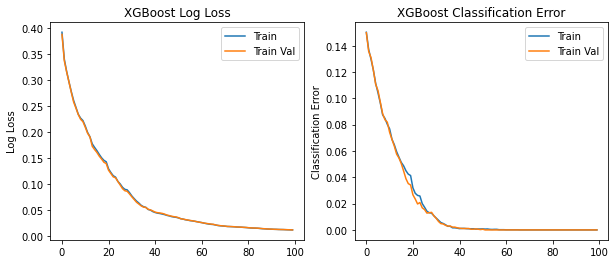

In [228]:
# retrieve performance metrics
results = xgb.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# plot log loss
fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].plot(x_axis, results['validation_0']['logloss'], label='Train')
axs[0].plot(x_axis, results['validation_1']['logloss'], label='Train Val')
axs[0].legend()
axs[0].set_ylabel('Log Loss')
axs[0].set_title('XGBoost Log Loss')

# plot classification error
axs[1].plot(x_axis, results['validation_0']['error'], label='Train')
axs[1].plot(x_axis, results['validation_1']['error'], label='Train Val')
axs[1].legend()
axs[1].set_ylabel('Classification Error')
axs[1].set_title('XGBoost Classification Error')

In [130]:
cv_results = cross_validate(xgb, X_train_small, y_train_small, cv=5, scoring=['accuracy', 'f1_macro'])
print(cv_results['test_accuracy'].mean(), cv_results['test_f1_macro'].mean())

[11:09:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:09:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:09:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this

### Full dataset

In [310]:
xgb = XGBClassifier(max_depth=60, n_estimators=40, njobs=-2)
xgb.fit(X_train, y_train,
        verbose=True,
        eval_set=[(X_train_train, y_train_train), (X_train_test, y_train_test)],
        eval_metric=["error", "logloss"], # error means accuracy
        early_stopping_rounds=1
        )

[00:10:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.09790	validation_0-logloss:0.52550	validation_1-error:0.09719	validation_1-logloss:0.52527
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 1 rounds.
[1]	validation_0-error:0.07560	validation_0-logloss:0.42463	validation_1-error:0.07589	validation_1-logloss:0.42466
[2]	validation_0-error:0.06202	validation_0-logloss:0.35357	validation_1-error:0.06276	validation_1-logloss:0.35374
[3]	validation_0-error:0.05152	validation_0-logloss:0.30066	validation_1-error:0.05208	validation_1-logloss:0.30081
[4]	validation_0-

[66]	validation_0-error:0.00011	validation_0-logloss:0.01706	validation_1-error:0.00015	validation_1-logloss:0.01711
[67]	validation_0-error:0.00011	validation_0-logloss:0.01678	validation_1-error:0.00015	validation_1-logloss:0.01684
[68]	validation_0-error:0.00012	validation_0-logloss:0.01652	validation_1-error:0.00013	validation_1-logloss:0.01658
[69]	validation_0-error:0.00012	validation_0-logloss:0.01627	validation_1-error:0.00013	validation_1-logloss:0.01632
[70]	validation_0-error:0.00011	validation_0-logloss:0.01603	validation_1-error:0.00014	validation_1-logloss:0.01608
[71]	validation_0-error:0.00012	validation_0-logloss:0.01579	validation_1-error:0.00013	validation_1-logloss:0.01584
[72]	validation_0-error:0.00012	validation_0-logloss:0.01556	validation_1-error:0.00013	validation_1-logloss:0.01561
[73]	validation_0-error:0.00011	validation_0-logloss:0.01532	validation_1-error:0.00014	validation_1-logloss:0.01537
[74]	validation_0-error:0.00012	validation_0-logloss:0.01511	val

[136]	validation_0-error:0.00011	validation_0-logloss:0.00819	validation_1-error:0.00014	validation_1-logloss:0.00822
[137]	validation_0-error:0.00011	validation_0-logloss:0.00814	validation_1-error:0.00013	validation_1-logloss:0.00816
[138]	validation_0-error:0.00011	validation_0-logloss:0.00808	validation_1-error:0.00013	validation_1-logloss:0.00810
[139]	validation_0-error:0.00011	validation_0-logloss:0.00803	validation_1-error:0.00014	validation_1-logloss:0.00805
[140]	validation_0-error:0.00012	validation_0-logloss:0.00797	validation_1-error:0.00013	validation_1-logloss:0.00799
[141]	validation_0-error:0.00012	validation_0-logloss:0.00792	validation_1-error:0.00012	validation_1-logloss:0.00793
[142]	validation_0-error:0.00012	validation_0-logloss:0.00786	validation_1-error:0.00012	validation_1-logloss:0.00788
[143]	validation_0-error:0.00012	validation_0-logloss:0.00781	validation_1-error:0.00013	validation_1-logloss:0.00783
[144]	validation_0-error:0.00011	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=60,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, njobs=-2, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [315]:
xgb_pred = xgb.predict(X_test)

print(classification_report(xgb_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90    230587
           1       0.48      0.66      0.55     43537

    accuracy                           0.83    274124
   macro avg       0.70      0.76      0.72    274124
weighted avg       0.86      0.83      0.84    274124



In [316]:
# Aren't we overfitting?
print(classification_report(xgb.predict(X_train), y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    642681
           1       1.00      1.00      1.00    179691

    accuracy                           1.00    822372
   macro avg       1.00      1.00      1.00    822372
weighted avg       1.00      1.00      1.00    822372



In [313]:
# retrieve performance metrics
results = xgb.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

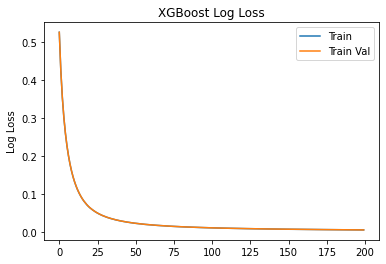

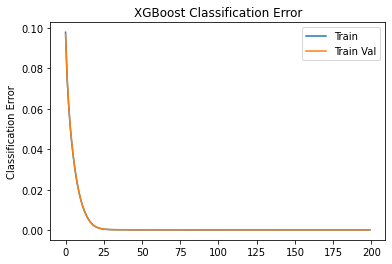

In [314]:
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Train Val')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Train Val')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

## Dense Neural Network

In [92]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [93]:
model = Sequential()
model.add(layers.Dense(100, input_dim=X.shape[1], activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               21600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 26        
Total params: 24,151
Trainable params: 24,151
Non-trainable params: 0
_________________________________________________________________


In [94]:
X_train_small.shape

(37500, 215)

In [128]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0005)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=opt,  metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=3, verbose=2, mode='min')

In [134]:
%%time
history = model.fit(X_train_small, y_train_small, validation_split=0.3,
                    epochs=400, batch_size=16, callbacks=[es],
                    verbose=2, workers=-1, use_multiprocessing=True)

Epoch 1/400
1641/1641 - 2s - loss: 0.2728 - accuracy: 0.8811 - val_loss: 0.4665 - val_accuracy: 0.8061
Epoch 2/400
1641/1641 - 2s - loss: 0.2724 - accuracy: 0.8809 - val_loss: 0.4676 - val_accuracy: 0.8115
Epoch 3/400
1641/1641 - 2s - loss: 0.2679 - accuracy: 0.8846 - val_loss: 0.4754 - val_accuracy: 0.8115
Epoch 4/400
1641/1641 - 2s - loss: 0.2631 - accuracy: 0.8862 - val_loss: 0.4809 - val_accuracy: 0.8101
Epoch 00004: early stopping
CPU times: user 9.32 s, sys: 2.3 s, total: 11.6 s
Wall time: 6.63 s


In [96]:
model.evaluate(X_test_small, y_test_small)

391/391 [==============================] - 0s 629us/step - loss: 0.3915 - accuracy: 0.8224


[0.3915366530418396, 0.8223999738693237]

In [121]:
# Test classif report
print(classification_report(model.predict_classes(X_test_small)[:,0], y_test_small))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     10811
           1       0.40      0.65      0.50      1689

    accuracy                           0.82     12500
   macro avg       0.67      0.75      0.69     12500
weighted avg       0.87      0.82      0.84     12500



In [122]:
# Train report
print(classification_report(model.predict_classes(X_train_small)[:,0], y_train_small))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     32342
           1       0.46      0.72      0.56      5158

    accuracy                           0.84     37500
   macro avg       0.70      0.79      0.73     37500
weighted avg       0.88      0.84      0.86     37500



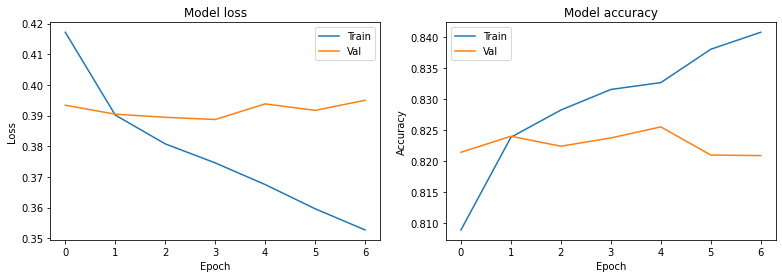

In [123]:
# Plot training & validation loss values
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

# Going Further

- Feature Engineering
    - Create weekday feature (monday, .... ,sunday)
    - Create "age of user" feature? 